# Importaciones

In [37]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [38]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Carga del modelo y sus métricas

In [39]:
# 1️⃣ Cargar el modelo
modelo = tf.keras.models.load_model("./results/multiclass/models/best_multiclass_model.h5")

# 2️⃣ Leer el CSV con las rutas de imágenes
csv_path = "./results/csv_files/registro_imagenes_reales_multiclass.csv"
df = pd.read_csv(csv_path)

/home/carlos/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/carlos/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [40]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 48)   │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 48)   │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 48)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 48)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 48)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        55,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,358,789 (85.29 MB)

 Trainable params: 22,357,667 (85.29 MB)

 Non-trainable params: 1,120 (4.38 KB)

 Optimizer params: 2 (12.00 B)

# Mapa de características

In [41]:
input_layer = Input(shape=(224, 224, 3))

In [42]:
print([layer.name for layer in modelo.layers])

['conv2d', 'batch_normalization', 'activation', 'max_pooling2d', 'dropout', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'max_pooling2d_1', 'dropout_1', 'conv2d_2', 'batch_normalization_2', 'activation_2', 'max_pooling2d_2', 'dropout_2', 'flatten', 'dense', 'batch_normalization_3', 'activation_3', 'dropout_3', 'dense_1']


ValueError: Exception encountered when calling Conv2D.call().

[1mKernel shape must have the same length as input, but received kernel of shape (3, 3, 3, 48) and input of shape (None, None, 224, 224, 3).[0m

Arguments received by Conv2D.call():
  • args=('<KerasTensor shape=(None, None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_706>',)
  • kwargs=<class 'inspect._empty'>

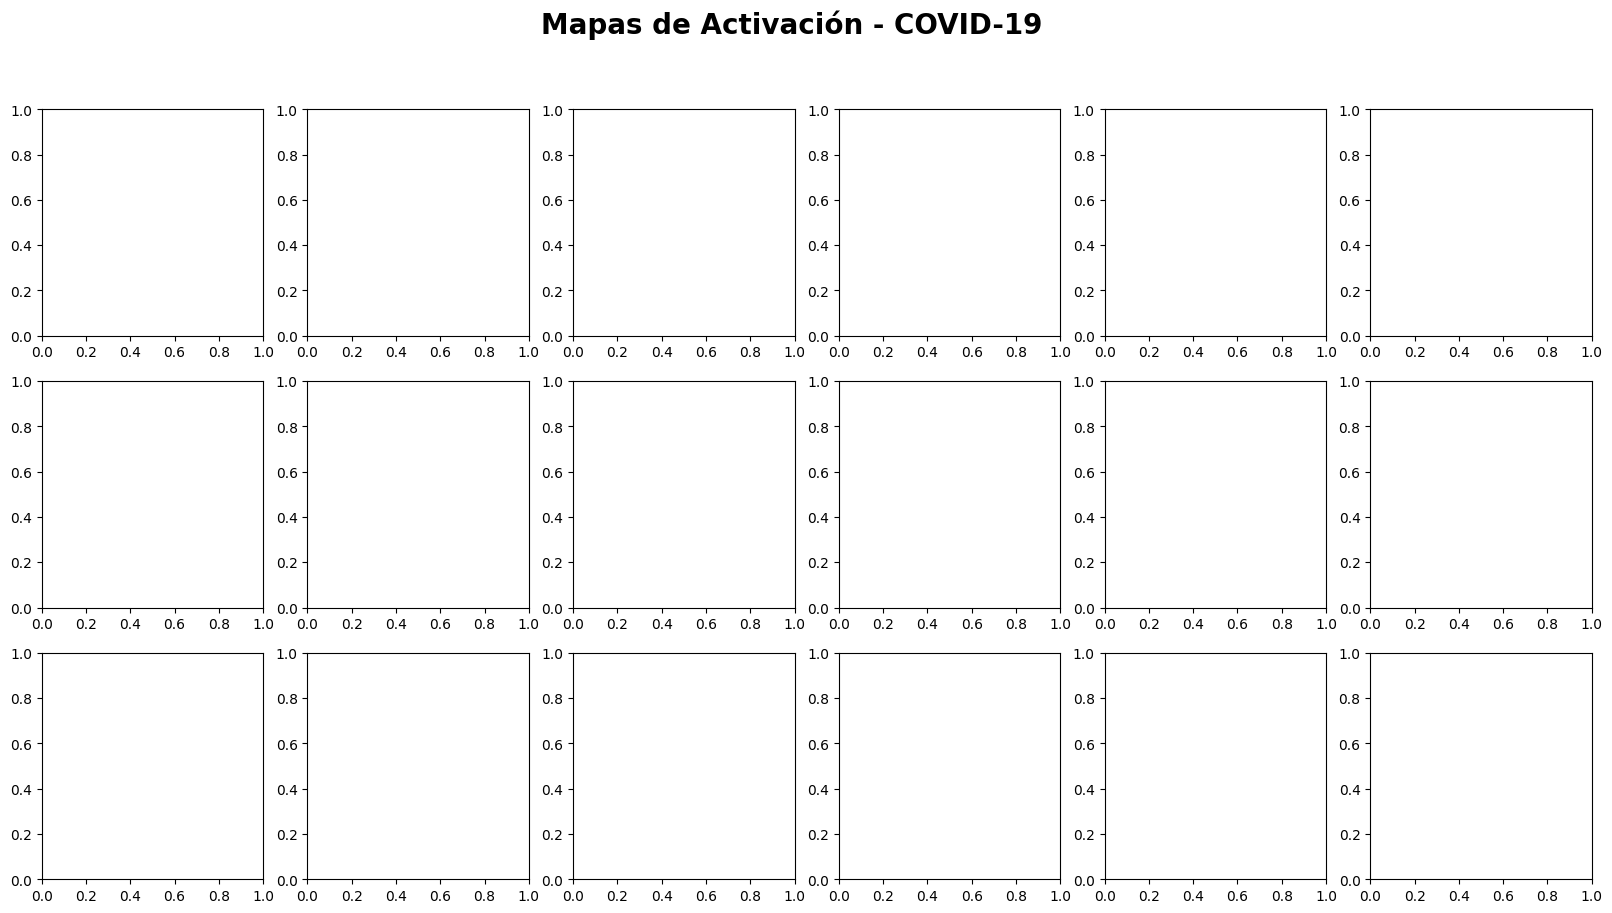

In [47]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Definir rutas de las imágenes
img_paths = {
    "COVID-19": "./data/covid-chest-xray/COVID-19/COVID-19-25.jpg",
    "No-COVID-19": "./data/covid-chest-xray/Normal/Normal-1.jpeg"
}

# Definir las capas de interés
conv_layers = ['activation', 'activation_1', 'activation_2']

# Lista para almacenar imágenes de figuras
fig_images = []

# Procesar cada imagen sin mostrarla
for label, img_path in img_paths.items():
    img = load_img(img_path, target_size=(224, 224), color_mode='rgb')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Crear figura sin mostrarla
    fig, axes = plt.subplots(len(conv_layers), 6, figsize=(20, 10))
    fig.suptitle(f"Mapas de Activación - {label}", fontsize=20, fontweight="bold")

    # Iterar sobre cada capa de convolución
    for row, layer_name in enumerate(conv_layers):
        layer_index = [i for i, layer in enumerate(modelo.layers) if layer.name == layer_name][0]
        intermediate_model = tf.keras.Sequential(modelo.layers[:layer_index + 1])

        # Obtener la salida de la imagen en esa capa
        feature_maps = intermediate_model.predict(img_array)

        # Visualizar activaciones de algunos filtros (máx 6)
        num_filters = feature_maps.shape[-1]
        for col in range(min(num_filters, 6)):
            axes[row, col].imshow(feature_maps[0, :, :, col], cmap='viridis')
            axes[row, col].axis("off")

            if col == 0:
                axes[row, col].set_title(f"Capa: {layer_name}", fontsize=14, fontweight="bold", loc="left")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Convertir la figura en una imagen sin mostrarla
    canvas = FigureCanvas(fig)
    canvas.draw()
    img_array = np.array(canvas.buffer_rgba())  # Convertir en imagen
    fig_images.append(img_array)  # Guardar imagen
    plt.close(fig)  # Cerrar la figura para no mostrarla

# Crear una nueva figura final con todas las imágenes
final_fig, final_axes = plt.subplots(len(fig_images), 1, figsize=(20, 10 * len(fig_images)))

# Si solo hay una figura, convertir axes en lista para evitar errores
if len(fig_images) == 1:
    final_axes = [final_axes]

# Insertar cada imagen en la figura final
for ax, img in zip(final_axes, fig_images):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

# Análisis del modelo

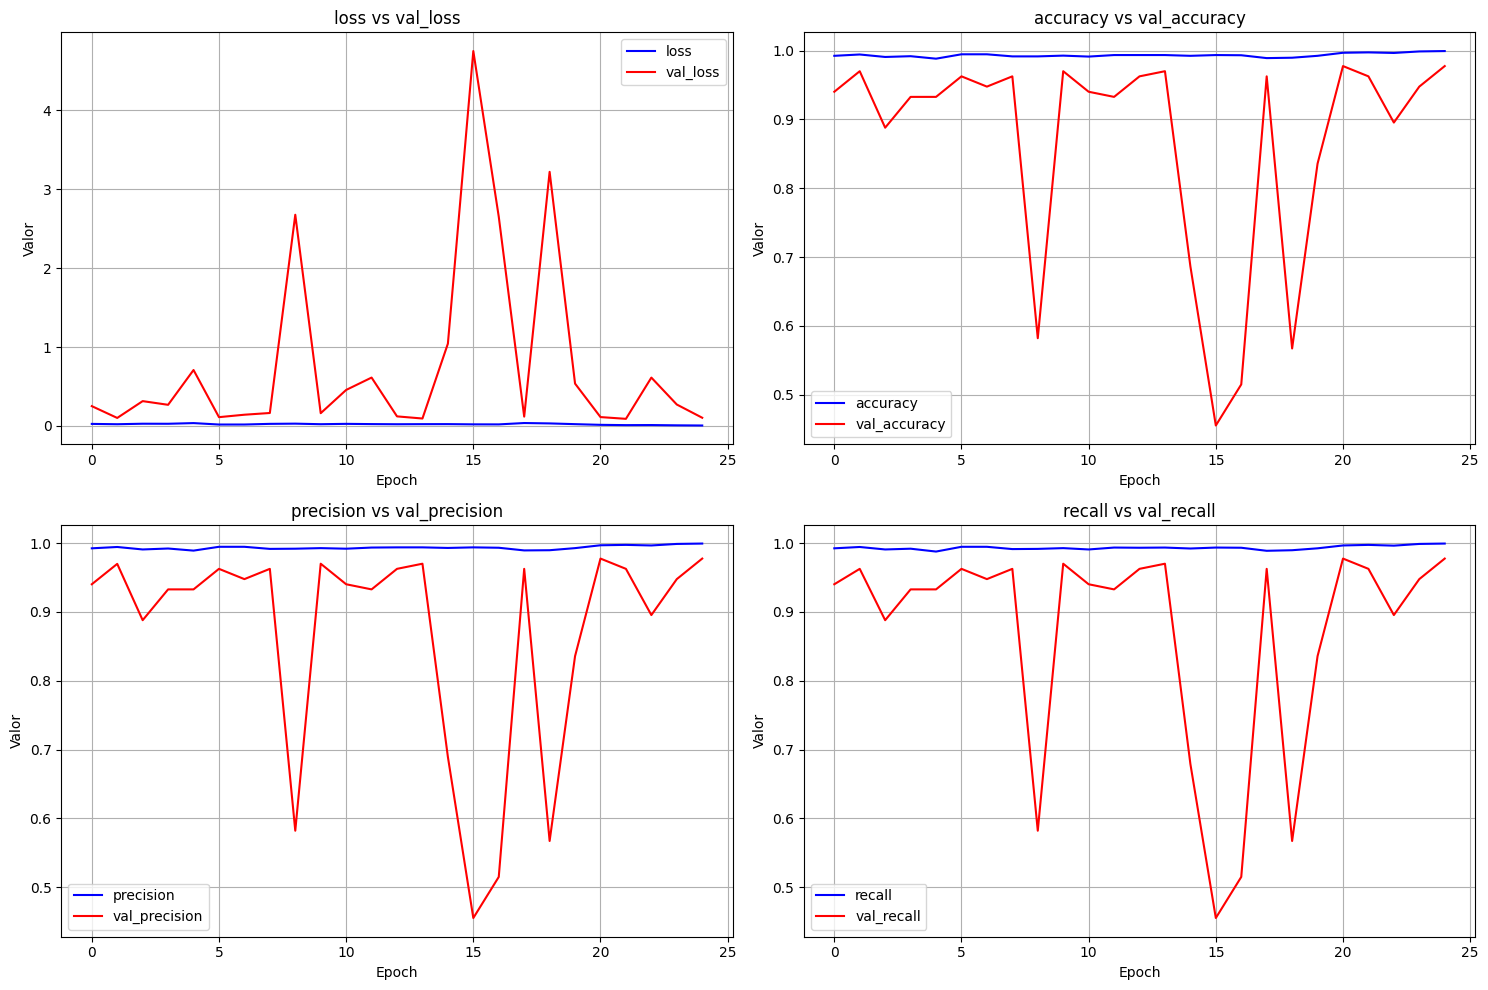

In [ ]:
# Cargar los datos
df_metrics = pd.read_csv("./results/csv_files/training_metrics_multiclass.csv")

# Identificar las métricas y sus versiones de validación
base_metrics = [col for col in df_metrics.columns if not col.startswith("val_")]
base_metrics.remove('auc')

# Definir la disposición de las subgráficas (3 en la primera fila, 2 en la segunda)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Graficar cada métrica junto con su versión de validación en una sola figura
for i, metric in enumerate(base_metrics):
    ax = axes[i]
    ax.plot(df_metrics.index, df_metrics[metric], label=metric, color='b')
    val_metric = f"val_{metric}"
    if val_metric in df_metrics.columns:
        ax.plot(df_metrics.index, df_metrics[val_metric], label=val_metric, color='r')
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Valor")
    ax.set_title(f"{metric} vs {val_metric}")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Filtrar solo las imágenes del conjunto de validación
df_val = df[df["Conjunto"] == "val"]

# Obtener rutas y etiquetas reales
image_paths = df_val["Ruta"].tolist()
y_true = df_val["Clase"].tolist()  # Asegúrate de que la columna tenga el nombre correcto

# # Obtener nombres de clases únicas (importante para el reporte y la matriz)
class_names = sorted(df_val["Clase"].unique())  # Ordenamos para que coincidan con índices
class_indices = {class_name: i for i, class_name in enumerate(class_names)}
y_true_indices = [class_indices[label] for label in y_true]  # Convertimos etiquetas a índices

# 3️⃣ Cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)  # Cargar la imagen
    if img is None:
        print(f"Error: No se pudo cargar la imagen en la ruta: {img_path}")
        return None  # O puedes lanzar una excepción
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB
    img = cv2.resize(img, target_size)  # Redimensionar
    img = img / 255.0  # Normalizar a [0, 1]
    return img

# Cargar todas las imágenes
X_val = np.array([load_and_preprocess_image(img.replace('\\', '/')) for img in image_paths])

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
Clase 0: Sensibilidad para 85% de especificidad = 1.0000
Clase 1: Sensibilidad para 85% de especificidad = 1.0000
Clase 2: Sensibilidad para 85% de especificidad = 1.0000


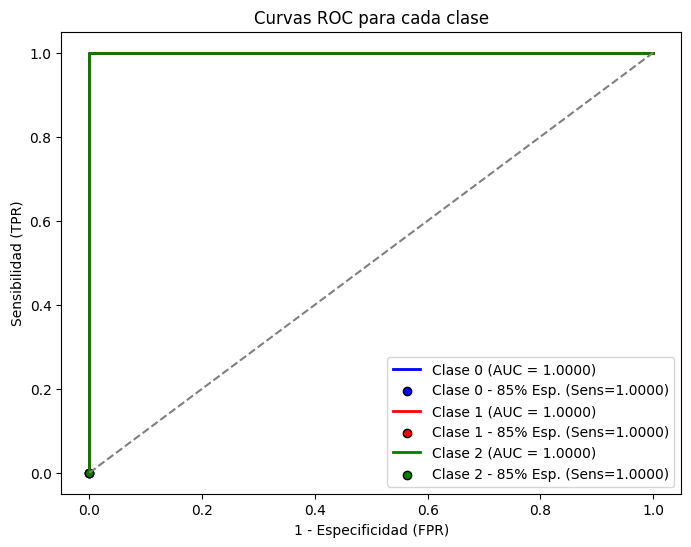

In [44]:
# Asegurar que y_true_indices sea un array de NumPy
y_true_indices = np.array(y_true_indices)

# Obtener las probabilidades de cada clase
y_scores = modelo.predict(X_val)  # Matriz de probabilidades de cada clase
n_classes = y_scores.shape[1]  # Número de clases

# Diccionarios para almacenar FPR, TPR, AUC y sensibilidad para 85% de especificidad
fpr = {}
tpr = {}
roc_auc = {}
sensibilidad_85esp = {}

# Colores para la gráfica
colors = ["blue", "red", "green"]

plt.figure(figsize=(8, 6))

# Calcular la curva ROC y el AUC para cada clase
for i in range(n_classes):
    # Obtener etiquetas binarizadas para la clase actual
    y_true_bin = (y_true_indices == i).astype(int)
    
    # Calcular la curva ROC
    fpr[i], tpr[i], thresholds = roc_curve(y_true_bin, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Calcular especificidad
    especificidad = 1 - fpr[i]

    # Encontrar el punto más cercano a 85% de especificidad
    idx = np.argmin(np.abs(especificidad - 0.85))
    sensibilidad_85esp[i] = tpr[i][idx]

    # Si el AUC es 1, se espera que la sensibilidad sea 1 en el punto de 85% especificidad
    if roc_auc[i] == 1:
        sensibilidad_85esp[i] = 1.0  # Forzar sensibilidad a 1 para AUC perfecto

    # Imprimir la sensibilidad para 85% de especificidad
    print(f"Clase {i}: Sensibilidad para 85% de especificidad = {sensibilidad_85esp[i]:.4f}")

    # Establecer el umbral en 1.0 para un modelo con AUC=1
    threshold_adjusted = 1.0  # Usar umbral de 1.0, lo cual es correcto para este modelo

    # Graficar la curva ROC
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, 
             label=f"Clase {i} (AUC = {roc_auc[i]:.4f})")

    # Marcar el punto de 85% de especificidad y agregar a la leyenda con el valor ajustado
    plt.scatter(fpr[i][idx], tpr[i][idx], color=colors[i], edgecolors="black",
                label=f"Clase {i} - 85% Esp. (Sens={sensibilidad_85esp[i]:.4f})")

# Línea diagonal de referencia
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.title("Curvas ROC para cada clase")
plt.legend(loc="lower right", fontsize=10)
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


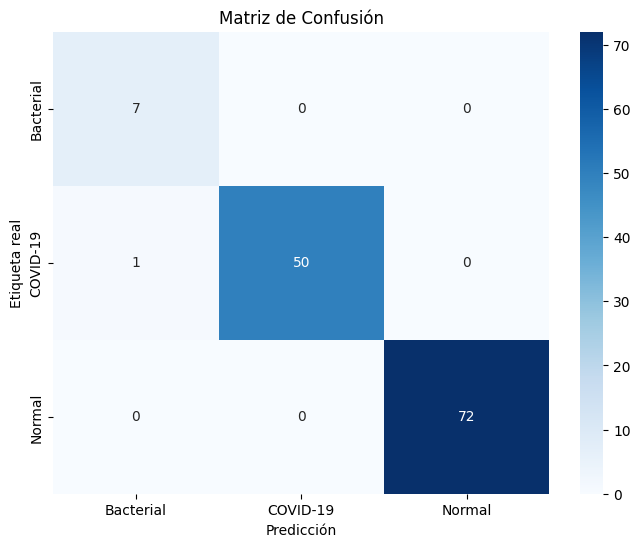

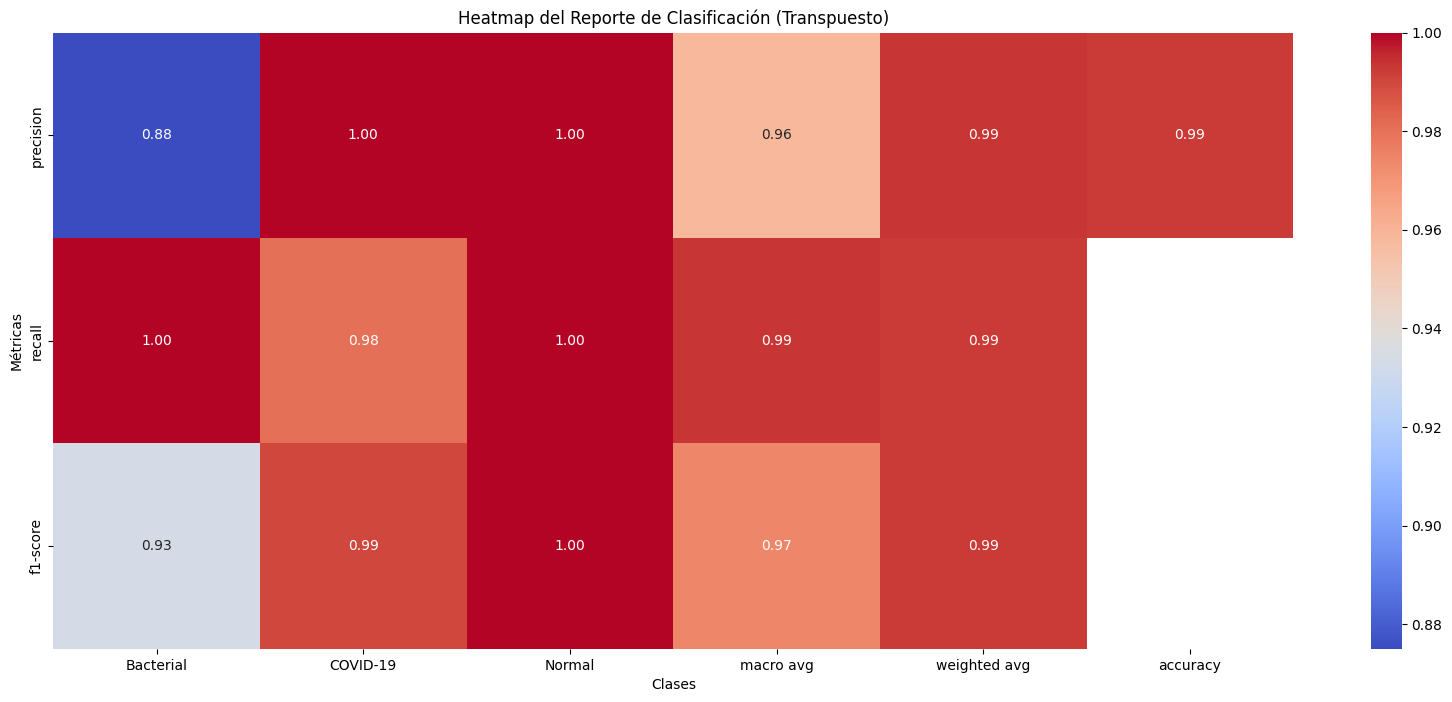

In [45]:
# Filtrar solo las imágenes del conjunto de validación
df_val = df[df["Conjunto"] == "val"]

# Obtener rutas y etiquetas reales
image_paths = df_val["Ruta"].tolist()
y_true = df_val["Clase"].tolist()  # Asegúrate de que la columna tenga el nombre correcto

# # Obtener nombres de clases únicas (importante para el reporte y la matriz)
class_names = sorted(df_val["Clase"].unique())  # Ordenamos para que coincidan con índices
class_indices = {class_name: i for i, class_name in enumerate(class_names)}
y_true_indices = [class_indices[label] for label in y_true]  # Convertimos etiquetas a índices

# 3️⃣ Cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)  # Cargar la imagen
    if img is None:
        print(f"Error: No se pudo cargar la imagen en la ruta: {img_path}")
        return None  # O puedes lanzar una excepción
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB
    img = cv2.resize(img, target_size)  # Redimensionar
    img = img / 255.0  # Normalizar a [0, 1]
    return img

# Cargar todas las imágenes
X_val = np.array([load_and_preprocess_image(img.replace('\\', '/')) for img in image_paths])

# 4️⃣ Hacer predicciones
y_pred_probs = modelo.predict(X_val)  # Obtiene probabilidades
y_pred_indices = np.argmax(y_pred_probs, axis=1)  # Índices de las clases predichas

# 5️⃣ Matriz de Confusión
cm = confusion_matrix(y_true_indices, y_pred_indices)

# 6️⃣ Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()

# 7️⃣ Imprimir informe de clasificación
report = classification_report(y_true_indices, y_pred_indices, target_names=class_names, output_dict=True)

# Extraer solo precision, recall y f1-score (sin support)
metrics = ["precision", "recall", "f1-score"]

# Incluir clases + "macro avg" + "weighted avg"
valid_labels = class_names + ["macro avg", "weighted avg"]

# Crear la matriz con métricas para las clases + promedios
report_matrix = np.array([[report[label][metric] for metric in metrics] for label in valid_labels], dtype=float)

# Extraer accuracy (valor único)
accuracy_value = report["accuracy"]

# Agregar accuracy como una fila adicional (usando np.nan en recall y f1-score)
accuracy_row = np.array([accuracy_value, np.nan, np.nan], dtype=float)
report_matrix = np.vstack([report_matrix, accuracy_row])

# Etiquetas de filas actualizadas (incluyendo "accuracy")
final_labels = valid_labels + ["accuracy"]

# 🚀 TRASPONER LA MATRIZ PARA QUE LAS MÉTRICAS SEAN FILAS Y LAS CLASES COLUMNAS
report_matrix = report_matrix.T

# 🚀 Ajustar el tamaño para que sea más alargada
plt.figure(figsize=(20, 8))  # Aumentar la altura

# Crear heatmap con la matriz traspuesta
sns.heatmap(report_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=final_labels, yticklabels=metrics)

plt.title("Heatmap del Reporte de Clasificación (Transpuesto)")
plt.xlabel("Clases")
plt.ylabel("Métricas")
plt.show()